<a href="https://colab.research.google.com/github/strangelycutlemon/camera_prices/blob/master/camera_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install packages in Colab
    !pip install category_encoders==2.0.0
    !pip install pandas-profiling==2.3.0
    !pip install plotly==4.1.1

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 614kB 34.7MB/s 
     |████████████████████████████████| 225kB 37.6MB/s 
     |████████████████████████████████| 307kB 15.9MB/s 
     |████████████████████████████████| 51kB 18.9MB/s 
     |████████████████████████████████| 194kB 42.4MB/s 
     |████████████████████████████████| 727kB 34.1MB/s 
     |████████████████████████████████| 51kB 19.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=02bc4073765e96ce5d9e9a606acbcebcd4f5b5f3c331d90b177712aa73ea7970
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=c5575e42766df1c8503abfc2a07c3e662a614a07f2842de7bbe1ddf9dcf76cf9
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708

In [15]:
import pandas as pd
import warnings

# squelch warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/strangelycutlemon/camera_prices/master/cameras.csv"

df = pd.read_csv(url)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


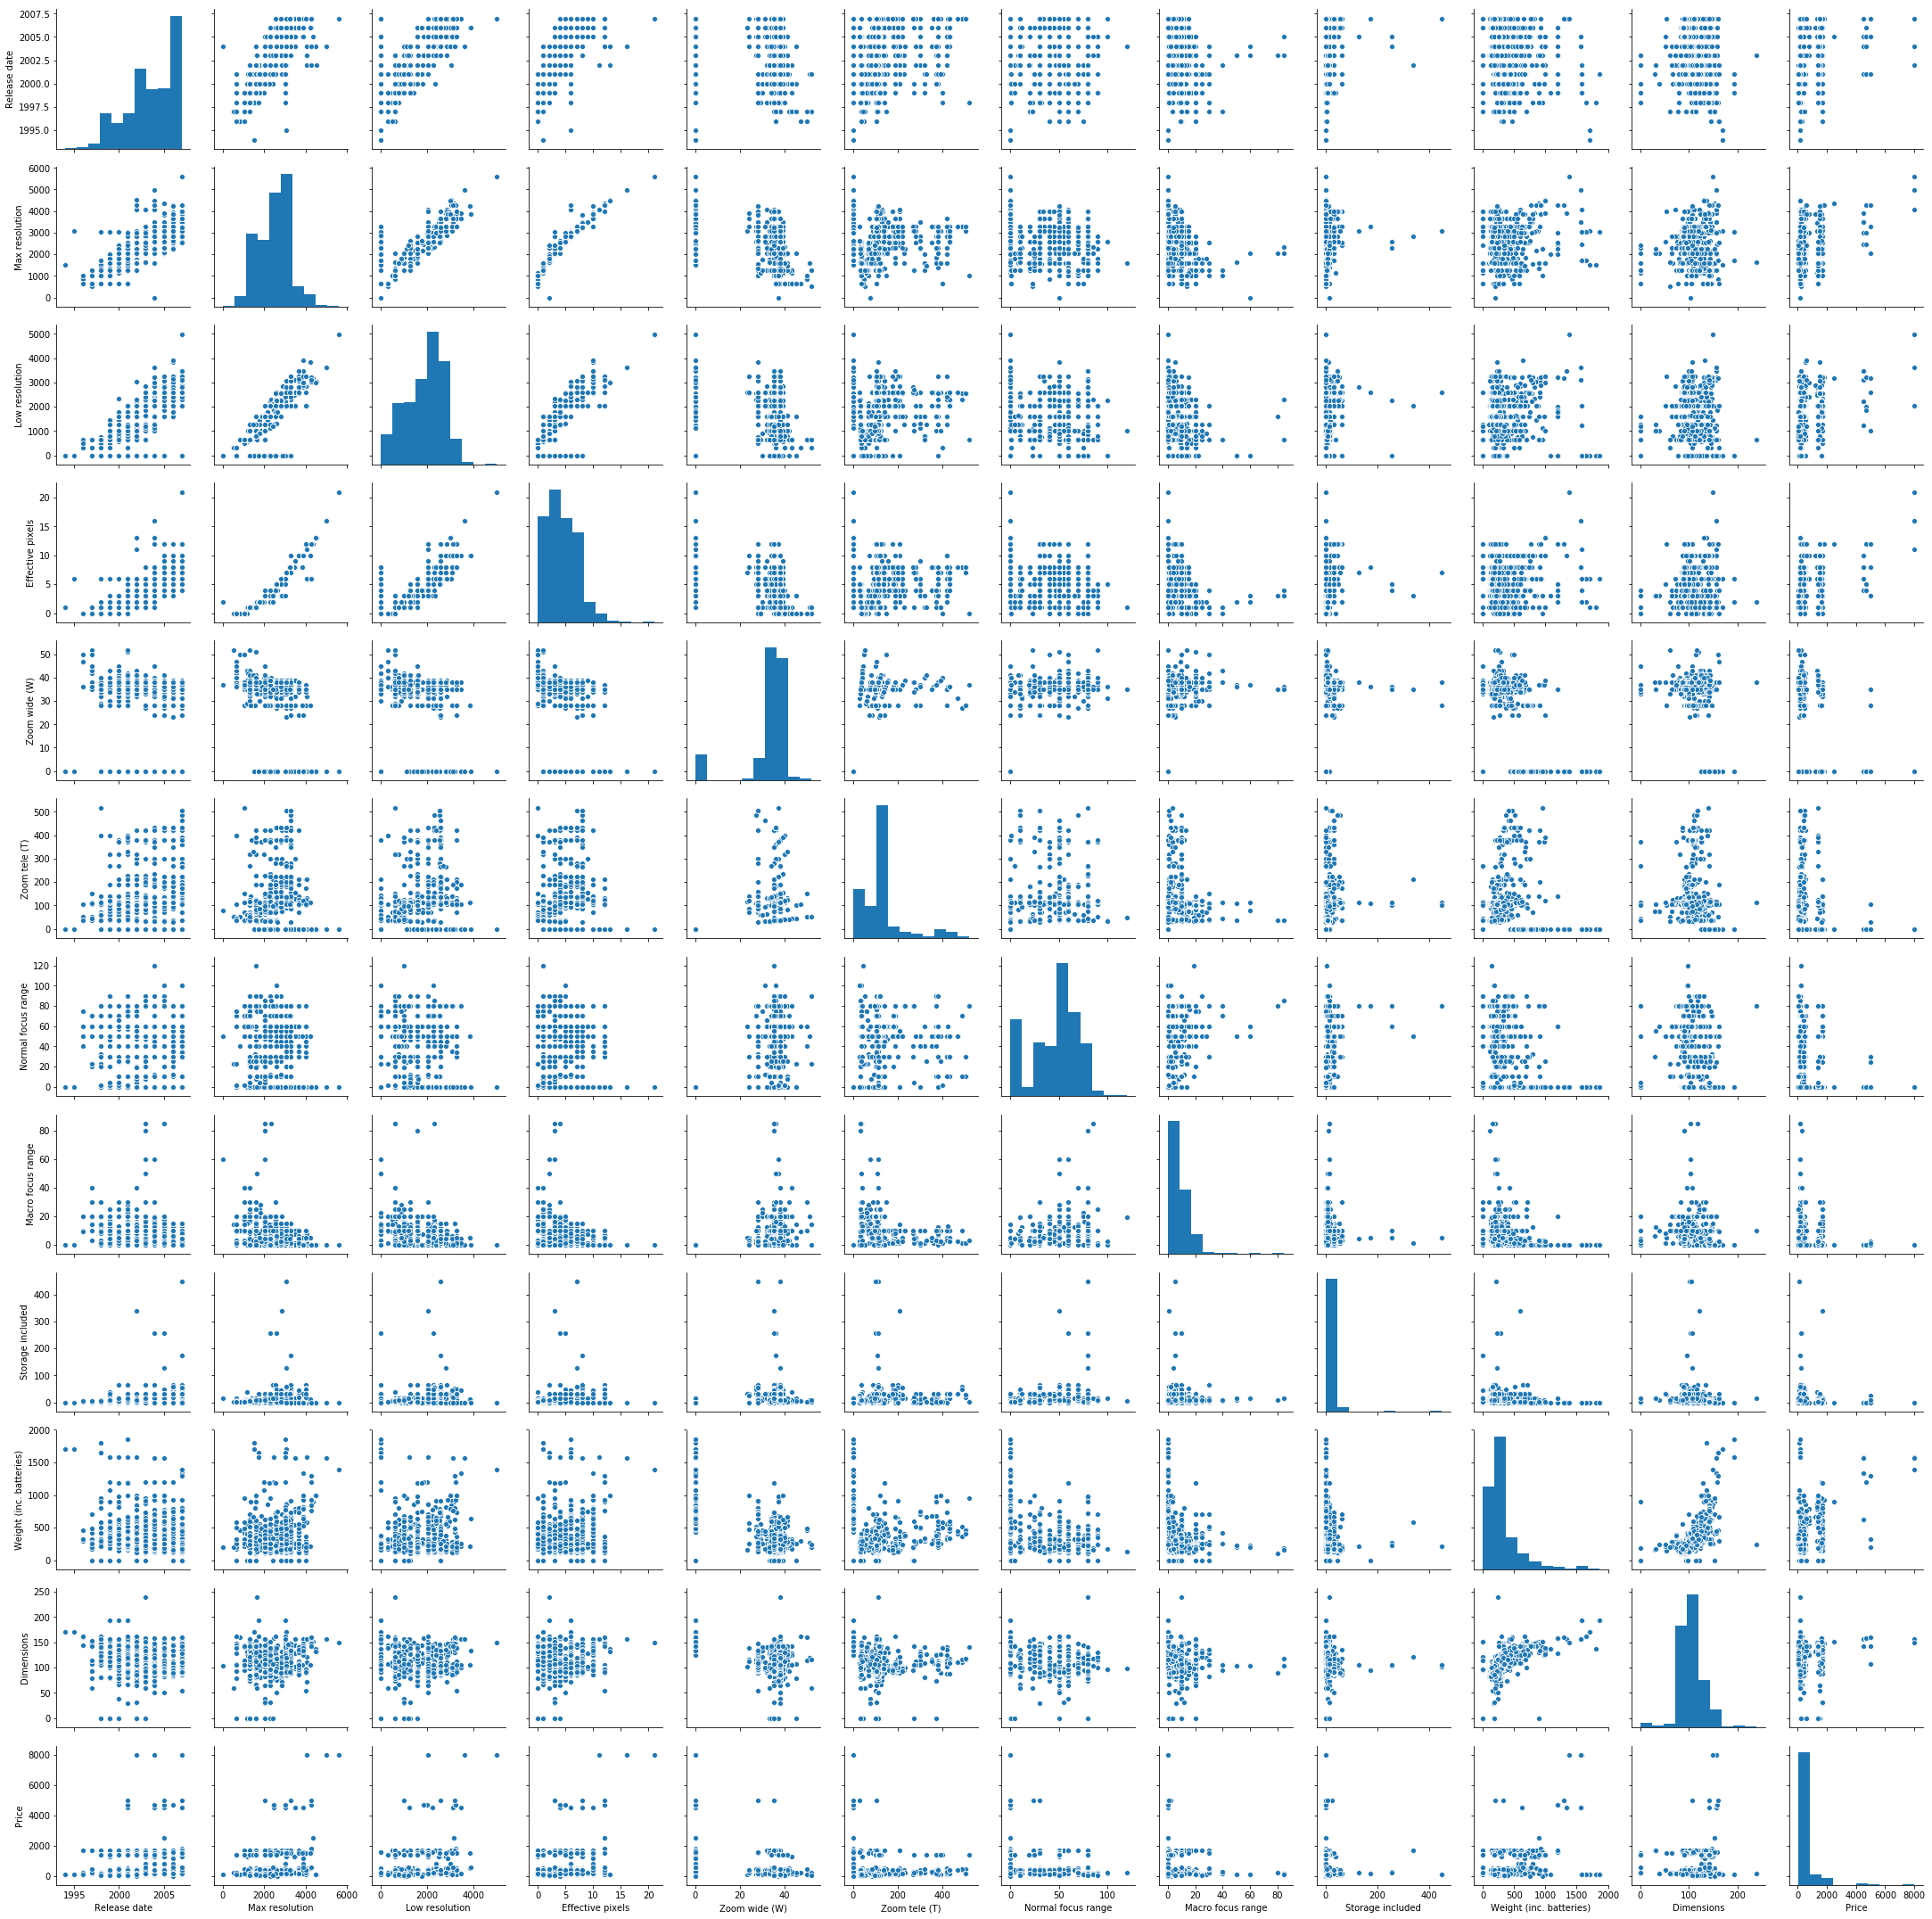

In [3]:
# import seaborn as sns

# sns.pairplot(df)

In [16]:
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [17]:
df.shape

(1038, 13)

In [18]:
# Check datatypes, null value counts, and unique values
pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis=1, keys=['isnull', 'nunique', 'dtypes'])

,isnull,nunique,dtypes
Model,0,1038,object
Release date,0,14,int64
Max resolution,0,99,float64
Low resolution,0,70,float64
Effective pixels,0,16,float64
Zoom wide (W),0,25,float64
Zoom tele (T),0,100,float64
Normal focus range,0,32,float64
Macro focus range,1,29,float64
Storage included,2,44,float64


In [19]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Model,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide_(W),Zoom_tele_(T),Normal_focus_range,Macro_focus_range,Storage_included,Weight_(inc._batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [0]:
df = df.rename(columns={'Zoom_wide_(W)':'Zoom_wide',
                        'Zoom_tele_(T)':'Zoom_tele',
                        'Weight_(inc._batteries)':'Weight'})

In [0]:
# Drop all 7 rows with nulls
df = df.dropna(axis=0)

In [37]:
# Create Brand feature
df['Brand'] = df['Model'].apply(lambda x: x.split()[0])
df.head()

,Model,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide,Zoom_tele,Normal_focus_range,Macro_focus_range,Storage_included,Weight,Dimensions,Price,Brand
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,Agfa
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,Agfa
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,Agfa
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,Agfa
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,Agfa


In [0]:
# create list of features
features = df.columns.tolist()

# remove Model due to high cardinality
features.remove('Model')
features.remove('Price')

In [59]:
features

['Release_date',
 'Max_resolution',
 'Low_resolution',
 'Effective_pixels',
 'Zoom_wide',
 'Zoom_tele',
 'Normal_focus_range',
 'Macro_focus_range',
 'Storage_included',
 'Weight',
 'Dimensions',
 'Brand']

In [60]:
# Create test and validation sets
from sklearn.model_selection import train_test_split

target = 'Price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(621, 12) (621,) (207, 12) (207,) (208, 12) (208,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
import category_encoders as ce

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
    # XGBRFRegressor(n_estimators=1000, random_state=42)
)

In [83]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Brand'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=-1,
                                       oob_score=False, random_state=42,
                                       verbos

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

baseline_guess = y_val.mean() * np.ones(len(y_val))
print(mean_absolute_error(y_val, baseline_guess))

y_val_hat = pipeline.predict(X_val)
print(mean_absolute_error(y_val, y_val_hat))


491.01939368480004
213.43155256498733


In [64]:
print(r2_score(y_val, y_val_hat))

0.610067138792207


In [65]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [70]:
regressor = pipeline.named_steps('randomforestregressor')

regressor

TypeError: ignored

In [85]:
import plotly.express as px

X = df[['Release_date', 'Max_resolution']]
y = df['Price']

pipeline.fit(X,y)

KeyError: ignored